## 라벨링 데이터
- 필요 없는 데이터 삭제
- 전반적인 데이터 통계치 확인

In [16]:
import os
import shutil
import zipfile
import json
import pandas as pd
from glob import glob

label_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\라벨링 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터"
unzip_dir = "./unzipped_라벨링"

part_files = sorted(glob(os.path.join(label_dir, "*.zip.part*")))

if not part_files:
    raise FileNotFoundError("병합할 .zip.part* 파일이 없습니다.")

zip_filename = part_files[0].split(".zip.part")[0] + ".zip"
merged_path = os.path.join(label_dir, zip_filename)

with open(merged_path, "wb") as outfile:
    for part in part_files:
        with open(part, "rb") as pf:
            shutil.copyfileobj(pf, outfile)

print(f"병합 완료: {merged_path}")

병합 완료: C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\라벨링 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터\TL_1.언어적_4._A03_30대.zip


In [17]:
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

In [18]:
label_root = r"C:\Users\USER\Desktop\동아리\O.P.C\프로젝트"
json_paths = glob(os.path.join(label_root, "**", "*.json"), recursive=True)

#빈 리스트 생성
label_dts = []

#json 파일 하나씩 열기
for path in json_paths:
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)

    label_dt = {}

    # 발표 내용
    label_dt["start_time"] = data.get("script", {}).get("start_time", "")
    label_dt["end_time"] = data.get("script", {}).get("end_time", "")
    label_dt["script_stt_txt"] = data.get("script", {}).get("script_stt_txt", "")
    label_dt["script_tag_txt"] = data.get("script", {}).get("script_tag_txt", "")
    label_dt["word_cnt"] = data.get("script", {}).get("word_cnt", 0)
    label_dt["audible_word_cnt"] = data.get("script", {}).get("audible_word_cnt", 0)
    label_dt["sent_cnt"] = data.get("script", {}).get("sent_cnt", 0)

    # 평가 점수(평균)
    label_dt["repeat_scr"] = data.get("average", {}).get("repeat_scr", 0.0)
    label_dt["filler_words_scr"] = data.get("average", {}).get("filler_words_scr", 0.0)
    label_dt["pause_scr"] = data.get("average", {}).get("pause_scr", 0.0)
    label_dt["wrong_scr"] = data.get("average", {}).get("wrong_scr", 0.0)
    label_dt["voc_quality_scr"] = data.get("average", {}).get("voc_quality_scr", 0.0)
    label_dt["vor_speed_sec_scr"] = data.get("average", {}).get("voc_speed_sec_scr", 0.0)
    label_dt["eval_grade"] = data.get("average", {}).get("eval_grade", "")

    # 파일명
    label_dt["filename"] = data.get("info", {}).get("filename", "")

    # 읽어들인 딕셔너리를 빈 리스트에 추가
    label_dts.append(label_dt)

# DataFrame으로 변환
df_presentations = pd.DataFrame(label_dts)

In [19]:
df_presentations.head()

,start_time,end_time,script_stt_txt,script_tag_txt,word_cnt,audible_word_cnt,sent_cnt,repeat_scr,filler_words_scr,pause_scr,wrong_scr,voc_quality_scr,vor_speed_sec_scr,eval_grade,filename
0,00:00,04:36,안녕하십니까 여러분.오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,안녕하십니까 여러분.오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,298,287,26,4.9,4.85,4.85,2.95,3.20,1.25,B0,A03_S01_F_A_01_001_02_WA_MO_presentation.json
1,00:00,04:07,안녕하십니까 E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합니...,안녕하십니까 E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합니...,370,355,25,3.0,4.85,4.80,3.00,3.50,3.15,B0,A03_S01_F_A_02_005_02_WA_MO_presentation.json
2,00:00,04:08,안녕하십니까 여러분 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,안녕하십니까 여러분 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,303,294,25,4.9,4.80,4.85,3.95,4.05,1.05,B0,A03_S01_F_A_02_006_02_WA_MO_presentation.json
3,00:00,04:45,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,377,375,26,3.1,4.85,4.85,3.95,3.40,1.10,C+,A03_S01_F_A_03_007_02_WA_MO_presentation.json
4,00:01,06:10,안녕하십니까 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최근...,안녕하십니까 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최근...,396,395,24,2.0,1.00,4.80,3.90,2.60,1.05,C0,A03_S01_F_A_03_009_02_WA_MO_presentation.json


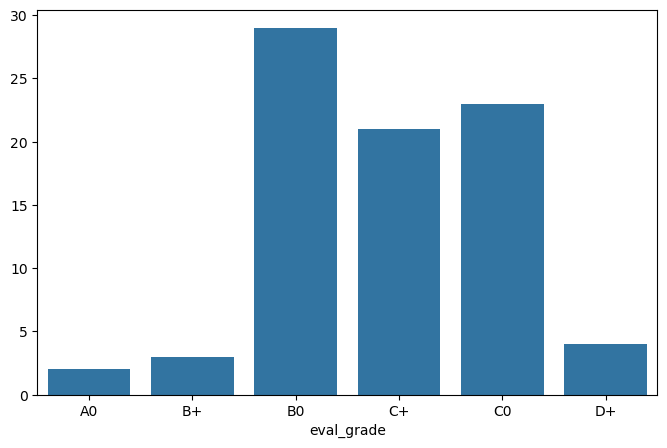

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#폰트 에러 메세지 삭제
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

grade_counts = df_presentations["eval_grade"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=grade_counts.index, y=grade_counts.values)
plt.show()

In [21]:
df_presentations.describe()

,word_cnt,audible_word_cnt,sent_cnt,repeat_scr,filler_words_scr,pause_scr,wrong_scr,voc_quality_scr,vor_speed_sec_scr
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,377.280488,363.219512,28.085366,3.329268,3.965854,4.193293,3.692683,3.135976,1.674390
std,37.843497,36.503686,2.811797,1.550726,1.413185,1.356119,0.482158,0.628258,1.070775
min,298.000000,287.000000,19.000000,1.050000,1.000000,1.000000,2.000000,1.400000,1.000000
25%,352.750000,336.250000,27.000000,2.000000,3.012500,4.650000,3.850000,2.800000,1.050000
50%,370.000000,360.000000,28.000000,3.900000,4.800000,4.800000,3.900000,3.175000,1.100000
75%,404.500000,389.000000,30.000000,4.850000,4.850000,4.850000,3.950000,3.500000,2.037500
max,478.000000,446.000000,34.000000,5.000000,5.000000,4.850000,4.100000,4.450000,4.900000


## 원본 데이터
- 라벨링 데이터에 원본 데이터 파일이 존재하는지 확인
- 원본 데이터 파일이 정상적으로 열리는지 확인

In [24]:
video_part_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\원본 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\01.원천데이터"
unzip_dir = "./unzipped_영상"

part_files = sorted(glob(os.path.join(video_part_dir, "*.zip.part*")), key=lambda x: int(x.split("part")[-1]))

zip_filename = part_files[0].split(".zip.part")[0] + ".zip"
merged_zip_path = os.path.join(video_part_dir, zip_filename)

with open(merged_zip_path, "wb") as outfile:
    for part in part_files:
        with open(part, "rb") as pf:
            shutil.copyfileobj(pf, outfile)

print(f"병합 완료: {merged_zip_path}")

os.makedirs(unzip_dir, exist_ok=True)
with zipfile.ZipFile(merged_zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"압축 해제 완료: {unzip_dir}")

병합 완료: C:\Users\USER\Desktop\동아리\O.P.C\프로젝트\원본 데이터\112.공적말하기_실습_및_평가_데이터\3.개방데이터\1.데이터\Training\01.원천데이터\TS_1.언어적_4._A03_30대.zip
압축 해제 완료: ./unzipped_영상


In [32]:
# 라벨링 데이터 - 원본 데이터 매핑
# 저장된 영상 파일 이름에 맞게 변환
df_presentations["file_stem"] = df_presentations["filename"].apply(
    lambda x: x.replace("_presentation.json", "")
)

# 영상 파일 이름 추출
video_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\unzipped_영상"
video_files = {
    os.path.splitext(f)[0]: f
    for f in os.listdir(video_dir)
    if f.lower().endswith(".mp4")
}

# 존재 여부 매핑
df_presentations["video_exists"] = df_presentations["file_stem"].apply(
    lambda stem: stem in video_files
)

# 매칭된 발표만 필터링
df_matched = df_presentations[df_presentations["video_exists"] == True].copy()

print(f"매칭된 발표 수: {len(df_matched)} / {len(df_presentations)}")
df_matched.head()

매칭된 발표 수: 82 / 82


,start_time,end_time,script_stt_txt,script_tag_txt,word_cnt,audible_word_cnt,sent_cnt,repeat_scr,filler_words_scr,pause_scr,wrong_scr,voc_quality_scr,vor_speed_sec_scr,eval_grade,filename,video_exists,file_stem
0,00:00,04:36,안녕하십니까 여러분.오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,안녕하십니까 여러분.오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,298,287,26,4.9,4.85,4.85,2.95,3.20,1.25,B0,A03_S01_F_A_01_001_02_WA_MO_presentation.json,True,A03_S01_F_A_01_001_02_WA_MO
1,00:00,04:07,안녕하십니까 E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합니...,안녕하십니까 E스포츠가 젊은이들에게 미치는 부정적인 영향에 대해 논의해 보고자 합니...,370,355,25,3.0,4.85,4.80,3.00,3.50,3.15,B0,A03_S01_F_A_02_005_02_WA_MO_presentation.json,True,A03_S01_F_A_02_005_02_WA_MO
2,00:00,04:08,안녕하십니까 여러분 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,안녕하십니까 여러분 오늘은 e스포츠가 젊은이들에게 미치는 긍정적인 영향에 대해 이야...,303,294,25,4.9,4.80,4.85,3.95,4.05,1.05,B0,A03_S01_F_A_02_006_02_WA_MO_presentation.json,True,A03_S01_F_A_02_006_02_WA_MO
3,00:00,04:45,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,안녕하십니까? 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최...,377,375,26,3.1,4.85,4.85,3.95,3.40,1.10,C+,A03_S01_F_A_03_007_02_WA_MO_presentation.json,True,A03_S01_F_A_03_007_02_WA_MO
4,00:01,06:10,안녕하십니까 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최근...,안녕하십니까 오늘은 e스포츠가 산업에 미치는 영향에 대해 이야기하고자 합니다. 최근...,396,395,24,2.0,1.00,4.80,3.90,2.60,1.05,C0,A03_S01_F_A_03_009_02_WA_MO_presentation.json,True,A03_S01_F_A_03_009_02_WA_MO


In [41]:
import sys
!{sys.executable} -m pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 8.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/39.5 MB 7.3 MB/s eta 0:00:06
   --- ------------------------------------ 3.9/39.5 MB 7.3 MB/s eta 0:00:05
   ----- ---------------------------------- 5.5/39.5 MB 7.5 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/39.5 MB 7.2 MB/s eta 0:00:05
   ------- -------------------------------- 7.9/39.5 MB 6.9 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/39.5 MB 6.8 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/39.5 MB 6.6 MB/s eta 0:00:05
   ----------- ---------------------------- 11.5/39.5 MB 6.6 MB/s eta 0:00:05
   ------------- -------------------------- 12.8/39.5 MB 6.5 MB/s eta 0:00:05
   -------------- ------------------------- 13.9/39.5 MB 6.4 MB/s eta 0:00:04
   --------------- ------------------------ 15.2/39.5 MB 6.3 MB/s eta 0:00:04
 

In [53]:
# 영상 재생 여부 확인
import cv2 # OpenCV 라이브러리 (영상 파일을 열고 프레임을 읽을 수 있음)

video_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\unzipped_영상"
video_paths = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.endswith(".mp4")]

results = []

for path in video_paths:
    filename = os.path.basename(path)
    cap = cv2.VideoCapture(path)

    if not cap.isOpened():
        results.append((filename, "열기 실패"))
        continue

    ret, frame = cap.read()
    if not ret:
        results.append((filename, "프레임 읽기 실패"))
    else:
        results.append((filename, "정상"))

    cap.release()

print(f"{len(results)}개 영상 점검 완료\n")
for fname, status in results:
    print(f"{status} - {fname}")

82개 영상 점검 완료

정상 - A03_S01_F_A_01_001_02_WA_MO.mp4
정상 - A03_S01_F_A_02_005_02_WA_MO.mp4
정상 - A03_S01_F_A_02_006_02_WA_MO.mp4
정상 - A03_S01_F_A_03_007_02_WA_MO.mp4
정상 - A03_S01_F_A_03_009_02_WA_MO.mp4
정상 - A03_S01_F_A_04_010_02_WA_MO.mp4
정상 - A03_S01_F_A_04_012_02_WA_MO.mp4
정상 - A03_S01_F_A_05_013_02_WA_MO.mp4
정상 - A03_S01_F_A_06_017_02_WA_MO.mp4
정상 - A03_S01_F_E_01_074_02_WA_MO.mp4
정상 - A03_S01_F_E_02_077_02_WA_MO.mp4
정상 - A03_S01_F_E_03_079_02_WA_MO.mp4
정상 - A03_S01_F_E_03_080_02_WA_MO.mp4
정상 - A03_S01_F_E_03_081_02_WA_MO.mp4
정상 - A03_S01_F_E_04_084_02_WA_MO.mp4
정상 - A03_S01_F_E_05_085_02_WA_MO.mp4
정상 - A03_S01_F_E_05_087_02_WA_MO.mp4
정상 - A03_S01_F_E_06_089_02_WA_MO.mp4
정상 - A03_S01_M_A_01_003_02_WA_MO.mp4
정상 - A03_S01_M_A_02_004_02_WA_MO.mp4
정상 - A03_S01_M_A_04_011_02_WA_MO.mp4
정상 - A03_S01_M_A_06_016_02_WA_MO.mp4
정상 - A03_S01_M_A_06_018_02_WA_MO.mp4
정상 - A03_S01_M_E_01_073_02_WA_MO.mp4
정상 - A03_S01_M_E_02_078_02_WA_MO.mp4
정상 - A03_S01_M_E_04_082_02_WA_MO.mp4
정상 - A03_S01_M_E_04_083_

In [49]:
!pip install moviepy

In [51]:
from moviepy import VideoFileClip

In [52]:
# 비디오 - 오디오 변환
video_dir = r"C:\Users\USER\Desktop\동아리\O.P.C\unzipped_영상"
output_dir = "./wav"
os.makedirs(output_dir, exist_ok=True)

for idx, row in df_matched.iterrows():
    stem = row["file_stem"]
    mp4_path = os.path.join(video_dir, f"{stem}.mp4")
    wav_path = os.path.join(output_dir, f"{stem}.wav")
    
    try:
        video = VideoFileClip(mp4_path)
        video.audio.write_audiofile(wav_path, codec='pcm_s16le')  # wav 포맷
        print(f"변환 완료: {stem}.wav")
    except Exception as e:
        print(f"변환 실패: {stem} - {e}")

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10001, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 275.4, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 'video_bitrate': 10001, 'video_fps': 30.0, 'default_au

MoviePy - Done.
변환 완료: A03_S01_F_A_01_001_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3372, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 247.0, 'bitrate': 3507, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_A_02_005_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3614, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 247.13, 'bitrate': 3750, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_F_A_02_006_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3514, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 285.23, 'bitrate': 3651, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_F_A_03_007_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 8995, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 369.5, 'bitrate': 9130, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_A_03_009_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2713, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 248.6, 'bitrate': 2848, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_A_04_010_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 9088, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 331.7, 'bitrate': 9223, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_A_04_012_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2593, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 282.9, 'bitrate': 2728, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_A_05_013_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2870, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 210.9, 'bitrate': 3005, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_A_06_017_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 8854, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 328.54, 'bitrate': 8990, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_F_E_01_074_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2486, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 228.3, 'bitrate': 2622, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_E_02_077_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10004, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 276.83, 'bitrate': 10139, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080]

MoviePy - Done.
변환 완료: A03_S01_F_E_03_079_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3245, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 212.8, 'bitrate': 3381, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_E_03_080_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2999, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 241.2, 'bitrate': 3135, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_E_03_081_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2876, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 233.13, 'bitrate': 3011, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_F_E_04_084_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3038, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 268.83, 'bitrate': 3174, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_F_E_05_085_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2882, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 242.53, 'bitrate': 3018, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_F_E_05_087_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3672, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 184.7, 'bitrate': 3807, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_F_E_06_089_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 9115, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 303.33, 'bitrate': 9251, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_M_A_01_003_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10001, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 319.1, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S01_M_A_02_004_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2576, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 245.95, 'bitrate': 2712, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_M_A_04_011_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3071, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 299.93, 'bitrate': 3206, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_M_A_06_016_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3712, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 198.6, 'bitrate': 3847, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_M_A_06_018_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2728, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 255.8, 'bitrate': 2863, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_M_E_01_073_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3094, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 388.3, 'bitrate': 3230, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_M_E_02_078_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2778, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 275.0, 'bitrate': 2914, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_M_E_04_082_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10002, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 243.83, 'bitrate': 10138, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080]

MoviePy - Done.
변환 완료: A03_S01_M_E_04_083_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2990, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 314.13, 'bitrate': 3126, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S01_M_E_06_088_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 8353, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 300.8, 'bitrate': 8489, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S01_M_E_06_090_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2904, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 244.3, 'bitrate': 3040, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_F_B_01_021_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 8480, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 357.8, 'bitrate': 8615, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_F_B_02_022_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10002, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 365.95, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080]

MoviePy - Done.
변환 완료: A03_S02_F_B_02_023_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2658, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 246.9, 'bitrate': 2793, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_F_B_02_024_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3189, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 314.24, 'bitrate': 3325, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_F_B_03_025_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2807, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 330.5, 'bitrate': 2943, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_F_B_05_031_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2514, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 300.0, 'bitrate': 2649, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_F_B_05_032_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 6315, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 241.35, 'bitrate': 6451, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_F_D_02_058_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2821, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 316.35, 'bitrate': 2956, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_F_D_02_060_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10001, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 300.1, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S02_F_D_04_064_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2591, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 286.03, 'bitrate': 2727, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_F_D_06_072_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2728, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 113, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 305.25, 'bitrate': 2848, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_M_B_01_019_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 9921, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 244.13, 'bitrate': 10057, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S02_M_B_01_020_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4132, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 294.13, 'bitrate': 4268, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_M_B_03_026_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3279, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 124, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 250.64, 'bitrate': 3410, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_M_B_03_027_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10000, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 361.1, 'bitrate': 10135, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S02_M_B_04_028_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4009, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 208.9, 'bitrate': 4145, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_M_B_04_030_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3173, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 297.2, 'bitrate': 3309, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_M_B_06_035_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4044, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 308.9, 'bitrate': 4179, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_M_B_06_036_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4705, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 262.55, 'bitrate': 4841, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_M_D_01_055_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10001, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 337.43, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080]

MoviePy - Done.
변환 완료: A03_S02_M_D_01_056_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2527, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 117, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 274.53, 'bitrate': 2652, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_M_D_02_059_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3928, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 126, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 299.5, 'bitrate': 4062, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_M_D_03_062_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3072, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 264.3, 'bitrate': 3207, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_M_D_04_065_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3104, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 281.63, 'bitrate': 3240, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S02_M_D_04_066_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3033, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 245.1, 'bitrate': 3169, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S02_M_D_06_070_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2720, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 235.9, 'bitrate': 2856, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_F_C_01_037_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10000, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 354.8, 'bitrate': 10135, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S03_F_C_01_038_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2958, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 267.7, 'bitrate': 3094, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_F_C_02_040_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3246, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 254.73, 'bitrate': 3381, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_F_C_02_042_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10000, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 233.0, 'bitrate': 10136, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S03_F_C_03_044_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2432, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 306.8, 'bitrate': 2568, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_F_C_04_047_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3891, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 237.84, 'bitrate': 4026, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_F_C_04_048_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10002, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 285.54, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080]

MoviePy - Done.
변환 완료: A03_S03_F_C_05_049_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10003, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 234.0, 'bitrate': 10138, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080],

MoviePy - Done.
변환 완료: A03_S03_F_C_05_050_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10002, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 268.13, 'bitrate': 10138, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080]

MoviePy - Done.
변환 완료: A03_S03_F_C_06_053_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 9879, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 304.5, 'bitrate': 10014, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_F_C_06_054_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 9299, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 314.0, 'bitrate': 9435, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_F_F_01_091_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3105, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 298.03, 'bitrate': 3241, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_F_F_02_093_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 10002, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 279.34000000000003, 'bitrate': 10137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': 

MoviePy - Done.
변환 완료: A03_S03_F_F_03_095_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3001, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 272.3, 'bitrate': 3137, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_F_F_04_097_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2705, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 320.13, 'bitrate': 2841, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_F_F_05_099_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2951, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 276.5, 'bitrate': 3087, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_M_C_01_039_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3021, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 297.8, 'bitrate': 3156, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_M_C_02_041_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2809, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 120, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 302.6, 'bitrate': 2936, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_M_C_03_043_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3033, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 288.21, 'bitrate': 3169, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_M_C_03_045_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4878, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 299.2, 'bitrate': 5014, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_M_C_04_046_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2465, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 124, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 226.73, 'bitrate': 2597, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_M_C_05_051_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3828, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 195.3, 'bitrate': 3963, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], '

MoviePy - Done.
변환 완료: A03_S03_M_C_06_052_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2857, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 256.53, 'bitrate': 2993, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_M_F_01_092_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3353, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 300.91, 'bitrate': 3488, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1920, 1080], 

MoviePy - Done.
변환 완료: A03_S03_M_F_03_096_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3761, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 213.32999999999998, 'bitrate': 3897, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1

MoviePy - Done.
변환 완료: A03_S03_M_F_04_098_02_WA_MO.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2429, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 289.40999999999997, 'bitrate': 2565, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [1

MoviePy - Done.
변환 완료: A03_S03_M_F_05_100_02_WA_MO.wav
